In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key from api_keys.py file
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Incorporate time to get today's date
date = time.strftime("%D")

'07/20/18'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Randomly select at least 500 unique cities based on lat and lng
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795'

In [4]:
# Create a pandas dataframe of all the randomly generated cities
df = pd.DataFrame(cities)

df = df.rename(columns={0:"City"})

# Add additional columns that we will use to analyze the temperature closer to the equator
df["Cloudiness"] = ""
df["Country"] = ""
df["Date"] = ""
df["Humidity"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Wind Speed"] = ""

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aklavik,,,,,,,,
1,acapulco,,,,,,,,
2,nikolskoye,,,,,,,,
3,hobart,,,,,,,,
4,mataura,,,,,,,,


In [18]:
# Use iterows to iterate through pandas dataframe
for index, row in df.iterrows():
    
    # Get the city name from the dataframe
    city = row["City"]
    
    try:
        # Assemble url and make API request
        response = requests.get(url + "&q=" + city).json()
        
        # Print index number and city name followed with the json url for the searched city
        print(f'Processing Record {index} | {city}')
        print(f'{url}&q={city.replace(" ","%20")}') # replace spaces with '%20' to get proper url formatting
        
        # parse through data and append results into the dataframe
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except:
        # if data is missing, leave as empty and skip to next one
        df.loc[index, 'Cloudiness'] = None
        df.loc[index, 'Country'] = None
        df.loc[index, 'Date'] = None
        df.loc[index, 'Humidity'] = None
        df.loc[index, 'Lat'] = None
        df.loc[index, 'Lng'] = None
        df.loc[index, 'Max Temp'] = None
        df.loc[index, 'Wind Speed'] = None
        print("Missing field/result... skipping.")
        
    print("------------")


Processing Record 0: aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=aklavik
------------
Processing Record 1: acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=acapulco
------------
Processing Record 2: nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=nikolskoye
------------
Processing Record 3: hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=hobart
------------
Processing Record 4: mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=mataura
------------
Processing Record 5: lydenburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=lydenburg
------------
Processing Record 6: tumannyy
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=victoria
------------
Processing Record 53: de panne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=de%20panne
------------
Processing Record 54: san antonio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=san%20antonio
------------
Processing Record 55: castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=castro
------------
Processing Record 56: cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=cairns
------------
Processing Record 57: kyabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=kyabe
------------
Processing Record 58: lahat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d06

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=qandala
------------
Processing Record 104: rio branco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=rio%20branco
------------
Processing Record 105: lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=lebu
------------
Processing Record 106: baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=baykit
------------
Processing Record 107: san andres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=san%20andres
------------
Processing Record 108: katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=katsuura
------------
Processing Record 109: ferme-neuve
http://api.openweathermap.org/data/2.5/weather?units=Imp

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=benghazi
------------
Processing Record 155: honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=honiara
------------
Processing Record 156: hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=hami
------------
Processing Record 157: port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=port%20elizabeth
------------
Processing Record 158: carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=carnarvon
------------
Processing Record 159: huazolotitlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=huazolotitlan
Missing field/result... skipping.
------------
Processing Record 160: mithi
http://api.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=kosa
------------
Processing Record 208: port augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=port%20augusta
------------
Processing Record 209: mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=mys%20shmidta
Missing field/result... skipping.
------------
Processing Record 210: karoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=karoi
------------
Processing Record 211: craig
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=craig
------------
Processing Record 212: sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=sao%20filipe
------------
Processing Record 213: mandera
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=mayumba
------------
Processing Record 259: half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=half%20moon%20bay
------------
Processing Record 260: kem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=kem
Missing field/result... skipping.
------------
Processing Record 261: pangody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=pangody
------------
Processing Record 262: kushmurun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=kushmurun
Missing field/result... skipping.
------------
Processing Record 263: hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=hovd
Missing field/result... skipping.
------

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=caravelas
------------
Processing Record 310: cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=cayenne
------------
Processing Record 311: lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=lata
------------
Processing Record 312: vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=vestmannaeyjar
------------
Processing Record 313: te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=te%20anau
------------
Processing Record 314: lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=lavrentiya
------------
Processing Record 315: kloulklubed
http://api.openweathermap.org/data/2.5/weather?u

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=morondava
------------
Processing Record 363: fort saint john
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=fort%20saint%20john
Missing field/result... skipping.
------------
Processing Record 364: nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=nabire
------------
Processing Record 365: senador jose porfirio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=senador%20jose%20porfirio
------------
Processing Record 366: basoko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=basoko
------------
Processing Record 367: tahara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=tahara
------------
Processing Record 3

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=coahuayana
------------
Processing Record 415: antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=antofagasta
------------
Processing Record 416: palu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=palu
------------
Processing Record 417: orasac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=orasac
------------
Processing Record 418: umm durman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=umm%20durman
Missing field/result... skipping.
------------
Processing Record 419: katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=katherine
------------
Processing Record 420: dera bugti
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=gushikawa
------------
Processing Record 468: mutsamudu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=mutsamudu
Missing field/result... skipping.
------------
Processing Record 469: bolshaya chernigovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=bolshaya%20chernigovka
Missing field/result... skipping.
------------
Processing Record 470: muravlenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=muravlenko
------------
Processing Record 471: hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=hay%20river
------------
Processing Record 472: dubrovnik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=dubrov

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=galveston
------------
Processing Record 520: mahanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=mahanje
Missing field/result... skipping.
------------
Processing Record 521: manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=manokwari
------------
Processing Record 522: saint-denis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=saint-denis
------------
Processing Record 523: teknaf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=teknaf
------------
Processing Record 524: fort washington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=fort%20washington
------------
Processing Record 525: bozeman
http:/

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=shache
------------
Processing Record 572: fengrun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=fengrun
------------
Processing Record 573: katrineholm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=katrineholm
------------
Processing Record 574: guapore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=guapore
Missing field/result... skipping.
------------
Processing Record 575: oshnaviyeh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=oshnaviyeh
------------
Processing Record 576: waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d0696b5800f687c6de537721dc2dd795&q=waipawa
------------
Processing Record 577: hukuntsi
http://api.openweather

In [27]:
# preview data that we received
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aklavik,40,CA,1532113200,66,68.22,-135.01,55.4,12.75
1,acapulco,90,MX,1532112060,70,16.86,-99.88,87.8,5.82
2,nikolskoye,75,RU,1532115000,83,59.7,30.79,71.6,4.47
3,hobart,75,AU,1532113200,70,-42.88,147.33,42.8,8.05
4,mataura,92,NZ,1532116664,72,-46.19,168.86,47.68,5.61


In [28]:
# verify we have same amount of data for the cities
len(df)

602

## Latitude vs Temperature Plot

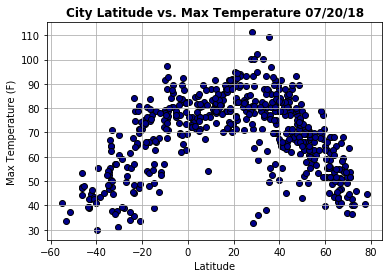

In [71]:
# Creating x and y axis of our plot
x_axis = df['Lat']
y_axis = df['Max Temp']

plt.scatter(x_axis,y_axis,marker='o',color='darkblue',edgecolors='black')

plt.title(f"City Latitude vs. Max Temperature {date}",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# save figure
plt.savefig("output_data/lat_vs_temperature.png")

# show figure
plt.show()

## Latitude vs. Humidity Plot

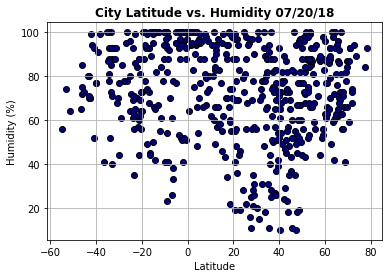

In [73]:
# Creating x and y axis of our plot
x_axis = df['Lat']
y_axis = df['Humidity']

plt.scatter(x_axis,y_axis,marker='o',color='darkblue',edgecolors='black')

plt.title(f"City Latitude vs. Humidity {date}",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# save figure
plt.savefig("output_data/lat_vs_humidity.png")

# show figure
plt.show()

## Latitude vs. Cloudiness Plot

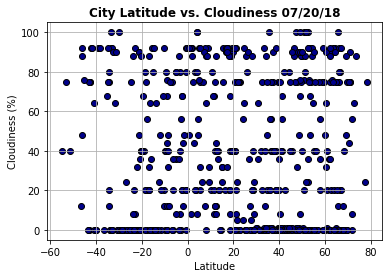

In [74]:
# Creating x and y axis of our plot
x_axis = df['Lat']
y_axis = df['Cloudiness']

plt.scatter(x_axis,y_axis,marker='o',color='darkblue',edgecolors='black')

plt.title(f"City Latitude vs. Cloudiness {date}",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# save figure
plt.savefig("output_data/lat_vs_cloudiness.png")

# show figure
plt.show()

## Latitude vs. Wind Speed Plot

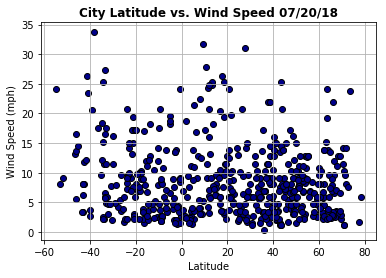

In [75]:
# Creating x and y axis of our plot
x_axis = df['Lat']
y_axis = df['Wind Speed']

plt.scatter(x_axis,y_axis,marker='o',color='darkblue',edgecolors='black')

# plot title, x and y labels, show grid
plt.title(f"City Latitude vs. Wind Speed {date}",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# save figure
plt.savefig("output_data/lat_vs_wind.png")

# show figure
plt.show()

In [61]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
df.to_csv(output_data_file, encoding="utf-8", index=False)

## Bonus (Longitude vs Latitude)

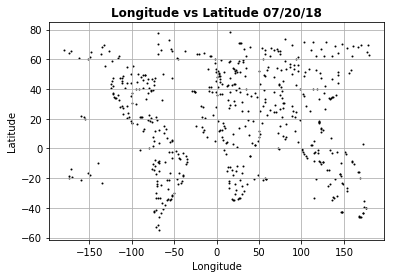

In [81]:
# Creating extra plot to view idea of how our coordinates of our cities in our data are spread out
x_axis = df['Lng']
y_axis = df['Lat']

plt.scatter(x_axis,y_axis,marker='o',color='darkblue',edgecolors='black',s=1)

# plot title, x and y labels, show grid
plt.title(f"Longitude vs Latitude {date}",fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()

# save figure
plt.savefig("output_data/lng_vs_lat.png")

# show figure
plt.show()

## Analysis